<a href="https://colab.research.google.com/github/Nagashree90/machine-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[3 4 2 5 6 7]


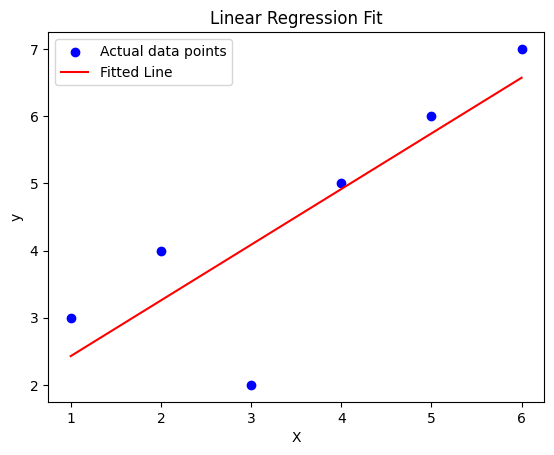

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create some sample data
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)  # Feature (input)
y = np.array([3, 4, 2, 5, 6, 7])                # Target (output)
print(X)
print(y)

# Step 2: Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values using the fitted model
y_pred = model.predict(X)

# Step 4: Plot the data points and the fitted line
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


It's not magic; the computer is basically figuring out a formula or set of rules that best fit the examples we give it. Think of it like teaching a child: you show them several examples (say, pictures of cats and dogs) and eventually they learn to recognize a cat versus a dog, some numbers and more on their own. Here, the computer "learns" from past data to make predictions about new data.

For example, if you notice you've been selling more cold drinks on hot days, you might predict that next hot day you'll sell a lot again. Predictive analytics in business works the same way: use historical data (like past sales, weather, costs, etc.) to forecast what might happen in the future.


Linear regression is one of the simplest algorithms in ML – it tries to draw a straight line through data points to capture the relationship between input factors and an outcome. If that sounds abstract, don't worry. It will make sense when we see it with real numbers.


Walk through a real example of predictive analytics: using a dataset of a small shop's sales and advertising budgets (from Kaggle) to predict future sales.
Use linear regression (a simple machine learning model) to learn the relationship between advertising spending and sales.
Use an AI assistant to generate Python code for data loading, model training, and prediction, step by step, rather than writing code from scratch.
Split data into training and testing sets to see how well our model does on unseen data (this is a core concept in ML to evaluate performance).
Introduce AutoML tools (from Google and H2O.ai) that can automate the kind of modeling we'll do – so you know what's out there beyond manual coding.
Wrap up with key takeaways and ensure the concepts are clear.


In [ ]:
#Introduction to Machine Learning (Predictive Analytics).


Imagine we have a small online shop that sells a product. We advertise this product through various channels – say TV commercials, radio ads, and newspaper ads – and we have data on how much we spent on each type of advertising and what our sales were in each scenario (for example, each row of data could be a different market or a different month). We want to answer a simple question: if we invest a certain amount in advertising, how many units can we expect to sell? This is a classic predictive analytics question, and it's perfect for linear regression.


### Train-Test Split: Why We Need It

In machine learning, our goal is to build models that can make accurate predictions on data they haven't seen before. If we train a model on all of our data and then evaluate it on the same data, we might get a misleadingly optimistic picture of its performance. This is because the model could have simply memorized the training data rather than learning the underlying patterns.

To address this, we use a technique called **train-test split**. We split our dataset into two parts:

1.  **Training Set:** This portion of the data is used to train the model. The model learns the relationships between features and the target variable from this data.
2.  **Testing Set:** This portion of the data is kept separate and is not used during training. After the model is trained, we use the testing set to evaluate how well the model generalizes to new, unseen data.

By evaluating the model on the testing set, we get a more realistic assessment of its performance and can identify if the model is overfitting (performing well on the training data but poorly on the testing data).

Let's apply this to our advertising example. We'll split our advertising data into a training set and a testing set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a sample DataFrame for demonstration
data = {'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.6, 57.5, 120.2, 8.6, 199.8],
        'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
        'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
        'Sales': [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 14.8]}
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 is used to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Original data shape:", df.shape)
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

As you can see from the output, the original data (10 rows, 4 columns) has been split into:

*   **Training set:** 8 rows for training the model (80% of the data).
*   **Testing set:** 2 rows for evaluating the model (20% of the data).

Now we can train our linear regression model on the `X_train` and `y_train` data and then evaluate its performance on the `X_test` and `y_test` data.

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True)


In [ ]:
import pandas as pd

# Assuming the CSV file is located at /tmp/advertising.csv
try:
    df = pd.read_csv('/content/Advertising.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: Advertising.csv not found. Please make sure the file is uploaded or the path is correct.")
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [ ]:
display(df.head())

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Let's check if there are any missing values in our dataset using the `.isnull().sum()` method. This is an important step in data cleaning to ensure our model doesn't encounter errors due to missing data.

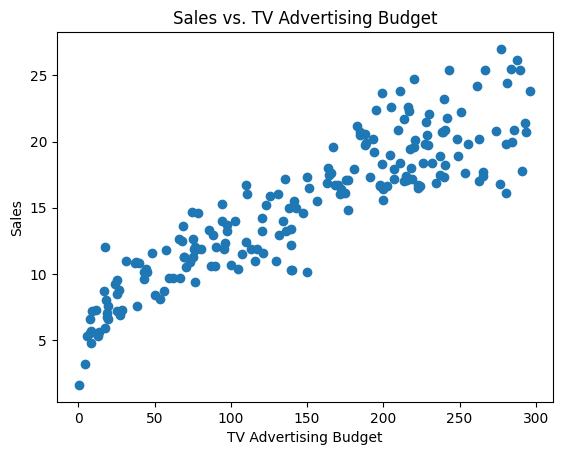

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising Budget')
plt.show()

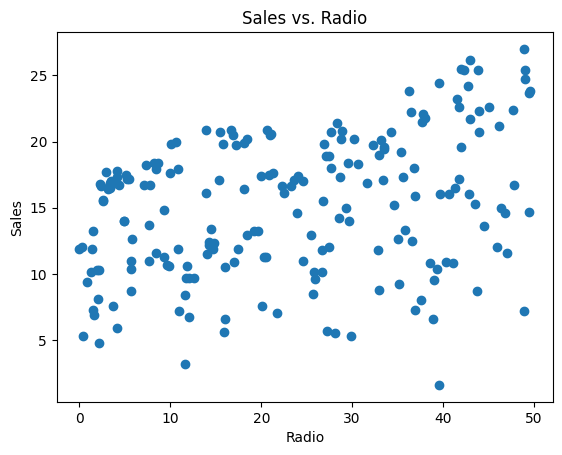

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales vs. Radio')
plt.show()

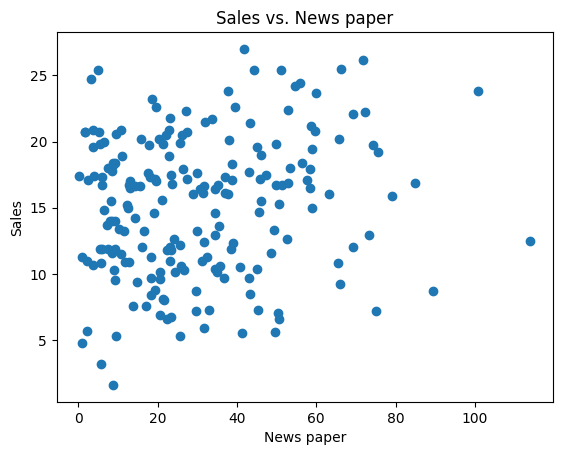

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('News paper')
plt.ylabel('Sales')
plt.title('Sales vs. News paper')
plt.show()

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']] # feature
y = df['Sales']         #target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (200, 3)
Shape of y: (200,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
# y = m1x+m2x+m3x+......+c,
# y = mx + c

In [ ]:

y_pred = model.predict(X_test)
#print(y_pred)
print(model.coef_,model.intercept_)

[0.05450927 0.10094536 0.00433665] 4.714126402214127


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test data
y_pred = model.predict(X_test)
#error = |y_pred - y_test|. |3-3.1| = |-0.1| = 0.1

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R2): 0.91


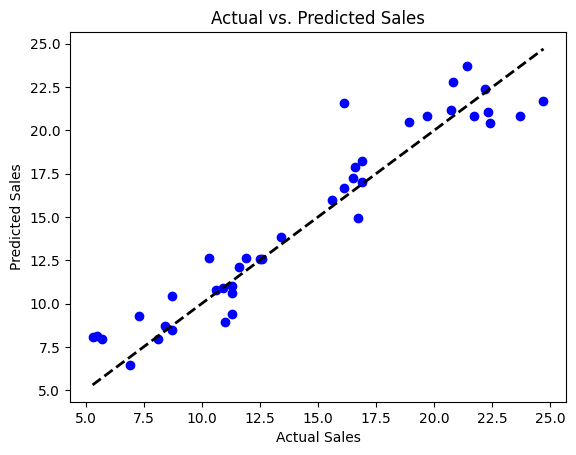

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

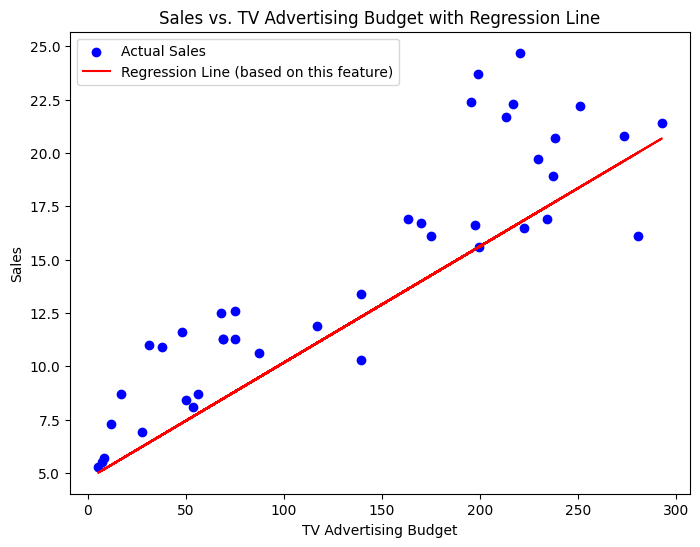

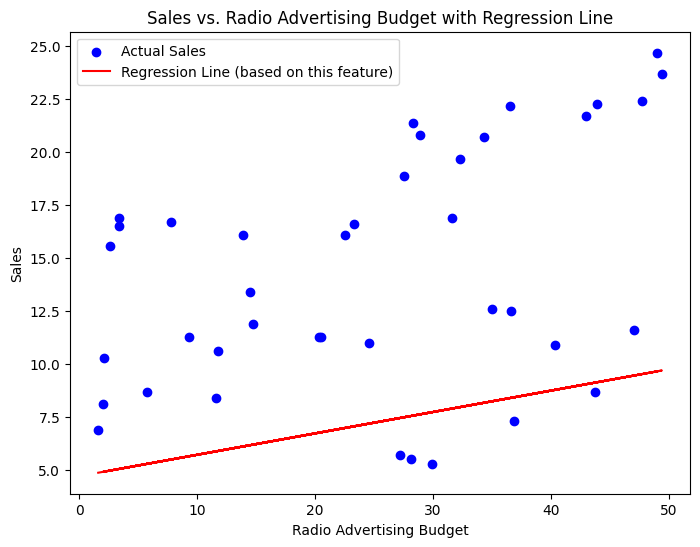

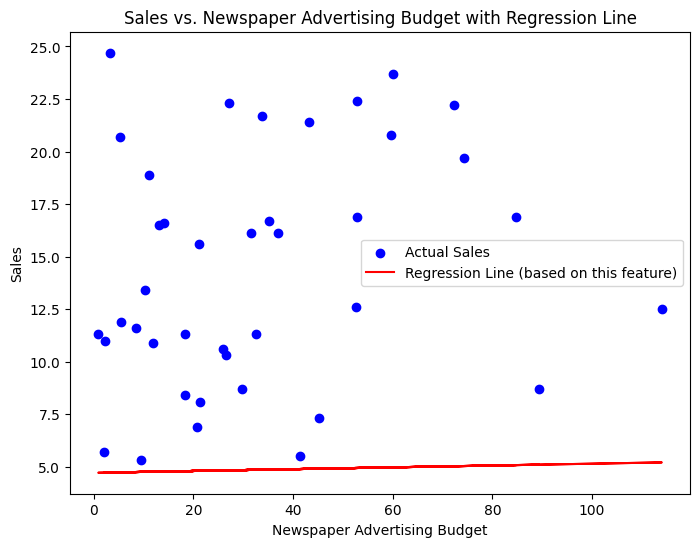

In [ ]:
import matplotlib.pyplot as plt

# Get the model's coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Create plots for each feature vs. Sales
features = ['TV', 'Radio', 'Newspaper']
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Sales')

    # Calculate predicted sales based on the current feature and the model's coefficients
    # This is an approximation for visualization purposes in 2D
    # The actual prediction uses all features
    predicted_sales_line = intercept + coefficients[i] * X_test[feature]
    plt.plot(X_test[feature], predicted_sales_line, color='red', label='Regression Line (based on this feature)')

    plt.xlabel(f'{feature} Advertising Budget')
    plt.ylabel('Sales')
    plt.title(f'Sales vs. {feature} Advertising Budget with Regression Line')
    plt.legend()
    plt.show()

The mathematical formula for Mean Absolute Error (MAE) is:

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

Where:
- $n$ is the number of data points.
- $y_i$ is the actual value for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.
- $|y_i - \hat{y}_i|$ is the absolute difference between the actual and predicted values for the $i$-th data point.

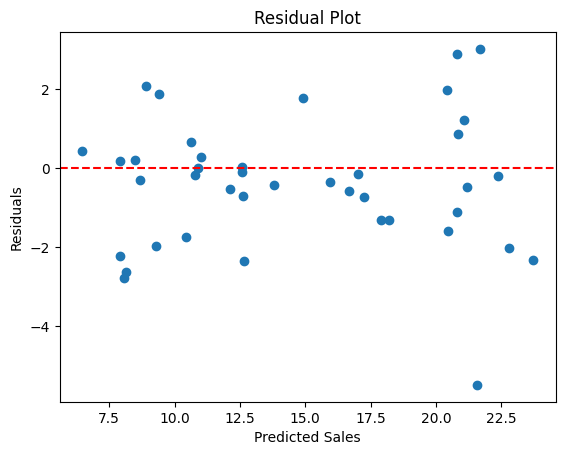

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()